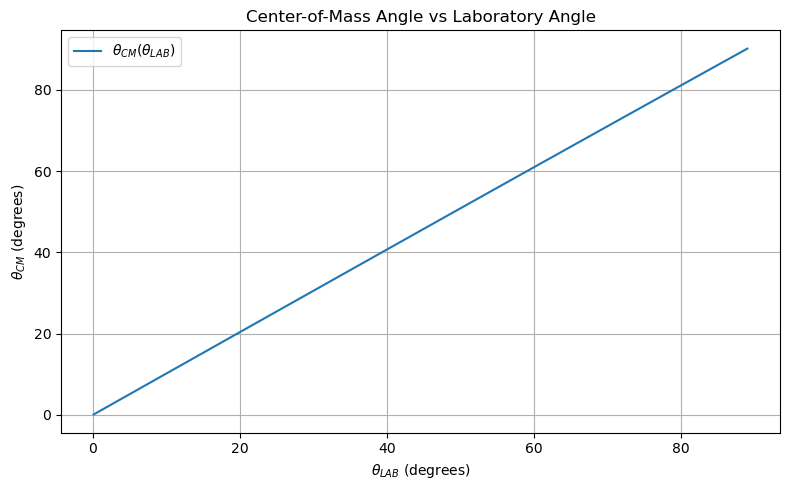

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

m = 1
M = 56
mass_ratio = m / M

def func(theta_CM_rad, theta_LAB_rad):
    return np.tan(theta_LAB_rad) - np.sin(theta_CM_rad) / (mass_ratio + np.cos(theta_CM_rad))

theta_LAB_deg = np.linspace(0.1, 90, 100)  # you can adjust
theta_CM_deg = []

# For each theta_LAB, find roots by scanning theta_CM range
theta_CM_scan = np.linspace(0, np.pi, 1000)

for theta_LAB in theta_LAB_deg:
    theta_LAB_rad = np.radians(theta_LAB)
    
    f_vals = func(theta_CM_scan, theta_LAB_rad)
    
    # Find sign changes
    sign_changes = np.where(np.diff(np.sign(f_vals)))[0]
    
    if len(sign_changes) == 0:
        # No root found
        theta_CM_deg.append(np.nan)
    else:
        # Take first root in [theta_CM_scan[i], theta_CM_scan[i+1]]
        i = sign_changes[0]
        try:
            sol = root_scalar(func, args=(theta_LAB_rad,), bracket=[theta_CM_scan[i], theta_CM_scan[i+1]], method='bisect')
            if sol.converged:
                theta_CM_deg.append(np.degrees(sol.root))
            else:
                theta_CM_deg.append(np.nan)
        except ValueError:
            theta_CM_deg.append(np.nan)

plt.figure(figsize=(8,5))
plt.plot(theta_LAB_deg, theta_CM_deg, label=r'$\theta_{CM}(\theta_{LAB})$')
plt.xlabel(r'$\theta_{LAB}$ (degrees)')
plt.ylabel(r'$\theta_{CM}$ (degrees)')
plt.title('Center-of-Mass Angle vs Laboratory Angle')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()